**Partie 2 — Données Réelles**

Exercice 2 

1.  Charger le jeu de données dans R avec la commande load

In [69]:
load("real_data.rda")


2.  Afficher la dimension de l’ensemble d’apprentissage.

In [70]:
dim(data)


[1] 1260    5

3.  Afficher les 6 premiers enregistrements.

In [71]:
head(data)


,DIFF,R2,R14,R17,R32
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.622,0.2320,0.0884,0.4313
2,0,0.617,0.1497,0.0671,0.3989
3,0,0.819,0.4847,0.0445,0.3187
4,0,0.733,0.3735,0.0621,0.4313
5,0,0.650,0.2563,0.0489,0.4313
6,0,0.755,0.1861,0.0243,0.4257


4.  On s’intéresse d’abord à la méthodologie du choix de k 

a.  Créer un jeu de données de données d’apprentissage de taille 945 (75% des 
données) et un jeu de données test de taille 315 (25% des données) avec le 
code suivant.

In [72]:

# indices pour l'échantillon d'apprentissage
train_index <- sample(1:nrow(data), size = 945, replace = FALSE)

# échantillon d'apprentissage
train_data <- data[train_index, ]

# échantillon de test
test_data <- data[-train_index, ]


b.  Calculer les taux d’erreur sur les données test pour k variant de 1 à 100. Avec 
la fonction plot, représenter ce taux d’erreur test en fonction de k (contrôler 
que l’abscisse du graphique part de 0). Avec la fonction which.min, trouver le 
nombre de voisins qui donne la plus petite erreur test.

[1] 86

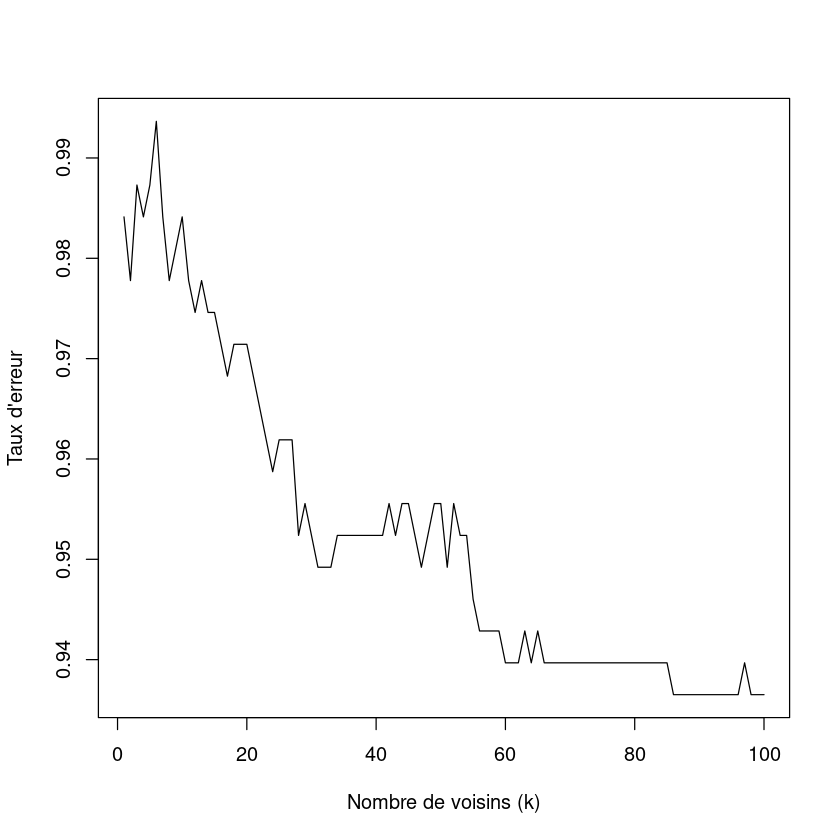

In [73]:
# chargement du package "class"
library(class)

# initialisation du vecteur des taux d'erreur
error_rates <- rep(NA, 100)

# boucle sur les différentes valeurs de k
for (k in 1:100) {
  # classification des observations du jeu de données de test avec k-NN
  pred <- knn(train = train_data[, -5], test = test_data[, -5], cl = train_data[, 5], k = k)
  
  # calcul du taux d'erreur
  error_rates[k] <- mean(pred != test_data[, 5])
}

plot(1:100, error_rates, type = "l", xlab = "Nombre de voisins (k)", ylab = "Taux d'erreur")

which.min(error_rates)



c. Recommencer avec un autre découpage aléatoire apprentissage/test et 
représenter la courbe d’évolution du taux d’erreur test sur le même graphique 
qu’à la question précédente.

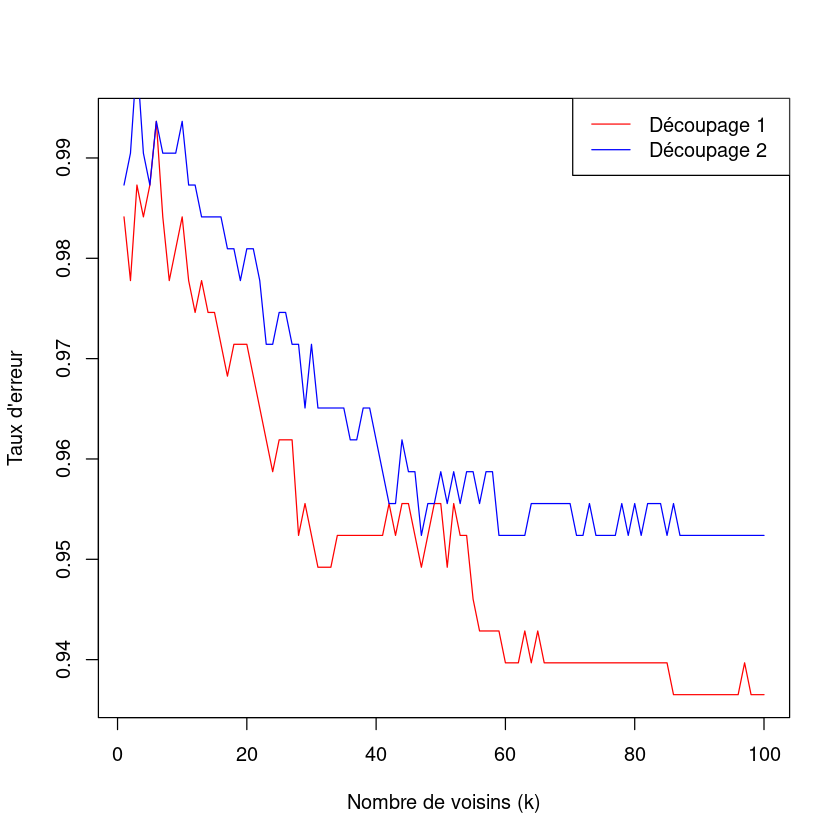

In [74]:
library(caret)
set.seed(12345)
indices <- sample(1:nrow(data), size = nrow(data), replace = FALSE)
train_data <- data[indices[1:945], ]
test_data <- data[indices[946:1260], ]

error_rates2 <- rep(NA, 100)
for (k in 1:100) {
  pred <- knn(train = train_data[, -5], test = test_data[, -5], cl = train_data[, 5], k = k)
  error_rates2[k] <- mean(pred != test_data[, 5])
}


plot(1:100, error_rates, type = "l", xlab = "Nombre de voisins (k)", ylab = "Taux d'erreur", col = "red")
lines(1:100, error_rates2, col = "blue")
legend("topright", legend = c("Découpage 1", "Découpage 2"), col = c("red", "blue"), lty = 1)


d.  Exécuter le code suivant et faire un choix pour k.

[1] 7

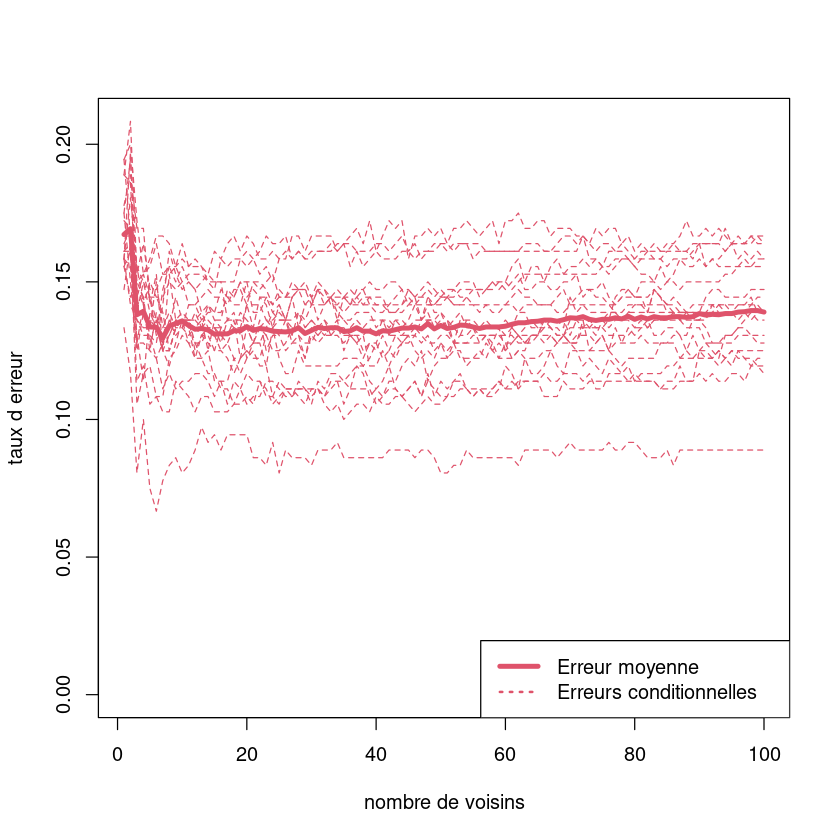

In [75]:
B <- 20 
kmax <- 100 
err_test <- matrix(NA, kmax, B)  

for (b in 1:B) {       
  tr <- sample(1:nrow(data), 900)       
  train <- data[tr,]       
  test <- data[-tr,]       
  for (k in 1:kmax) {              
    pred <- knn(train[,-1], test[,-1], train$DIFF, k)              
    err_test[k,b] <- sum(pred != test$DIFF)/length(test$DIFF)          
  }      
}  

mean_err_test <- apply(err_test, 1, mean) 
lim <- c(0, max(err_test)) 
matplot(err_test, type = "l", lty = 2, col = 2, ylim = lim, xlab = "nombre de voisins", ylab = "taux d erreur") 
matpoints(mean_err_test, type = "l", col = 2, lwd = 4) 
legend("bottomright", legend = c("Erreur moyenne", "Erreurs conditionnelles"), lty = c(1, 3), lwd = c(4, 2), col = c(2, 2))  

which.min(mean_err_test) 


e. On peut utiliser la fonction knn.cv pour effectuer une validation croisée leave-one-out et obtenir une estimation plus précise du taux d'erreur pour chaque valeur de k. Cette fonction choisit automatiquement le k optimal en minimisant l'erreur de validation croisée.

f. Le choix du paramètre k est crucial pour la performance du modèle k-NN. Les méthodes de validation croisée peuvent aider à choisir un k optimal, mais il est important de garder à l'esprit que la performance du modèle peut varier en fonction du jeu de données et de la qualité des variables prédictives. Il est également important d'évaluer la performance du modèle sur un jeu de données indépendant pour s'assurer qu'il généralise bien aux nouvelles données.

5.  On veut maintenant non seulement choisir k mais également avoir une idée de l’erreur de prédiction de ce classifieur. Pour cela, il faut utiliser des données n’ayant jamais été utilisées. Les données doivent donc être découpées en trois parties : apprentissage/validation/test

a.  Couper aléatoirement les données deux parties : un ensemble "apprentissage-
validation" de taille 945 (75 % des données) et un ensemble test de taille 315 
(25% des données). 

In [85]:
set.seed(123)
n <- nrow(data)
train_size <- 0.75 * n
train_val <- sample(seq_len(n), train_size)
train_val_data <- data[train_val, ]
test_data <- data[-train_val, ]


b.  Utiliser  la  première  approche  pour  choisir  k  sur  l’ensemble  "apprentissage-
validation" :

. Choisir k en découpant les 945 données de l’ensemble "apprentissage-
validation" en deux parties : une partie "apprentissage" de taille 630 
(50% des données) et une partie "validation" de taille 315 (25 % des 
données).  Choisir  k  qui  minimise  le  taux  d’erreur  moyen  sur  les  
ensembles de validations de B = 25 découpages.

In [86]:
library(class)
set.seed(123)
n <- nrow(train_val_data)
train_size <- 0.5 * n
cv_err <- rep(0, 100)
for (k in 1:100) {
  err_k <- rep(0, 25)
  for (i in 1:25) {
    tr <- sample(1:n, train_size)
    train <- train_val_data[tr, ]
    val <- train_val_data[-tr, ]
    pred <- knn(train[, -1], val[, -1], train$DIFF, k)
    err_k[i] <- sum(pred != val$DIFF) / nrow(val)
  }
  cv_err[k] <- mean(err_k)
}
k_cv <- which.min(cv_err)



Construire  le  classifieur  avec  ce  nombre  de  voisins  sur  l’ensemble  "apprentissage-validation"  et  calculer  le  taux  d’erreur  des  données  test.

In [88]:
train_data <- train_val_data[-which.max(cv_err), ]
knn_fit <- knn(train_data[, -1], test_data[, -1], train_data$DIFF, k_cv)
test_err <- mean(knn_fit != test_data$DIFF)
test_err

[1] 0.1047619

c. Utiliser  la  seconde  approche  pour  choisir  k  par  validation  croisée  LOO  sur  l’ensemble  "apprentissage-validation".  Calculer  ensuite  le  taux  d’erreur  des  données test.

In [94]:
cv_loo_err <- rep(0, 100)
for (k in 1:100) {
  pred <- knn.cv(train_val_data[, -1], train_val_data$DIFF, k, prob  = TRUE)
  cv_loo_err[k] <- mean(pred != train_val_data$DIFF)
}
k_loo <- which.min(cv_loo_err)

knn_fit <- knn(train_val_data[, -1], test_data[, -1], train_val_data$DIFF, k_loo)
test_err <- mean(knn_fit != test_data$DIFF)
test_err

[1] 0.0984127